In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


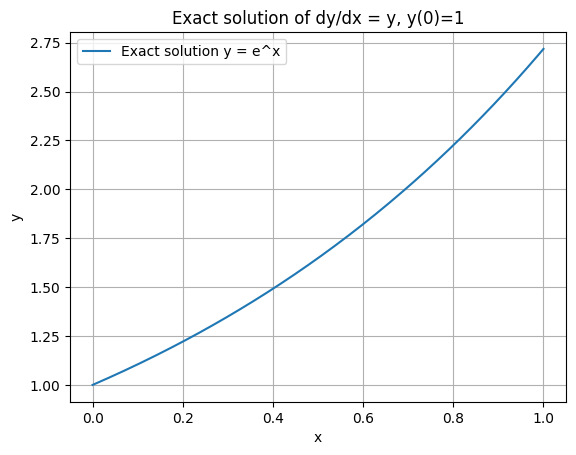

In [2]:
# ODE: dy/dx = y,  y(0) = 1,  x in [0, 1]
# exact solution: y(x) = e^x

def y_exact(x):
    return np.exp(x)

# plot the exact solution on [0, 1]
x_fine = np.linspace(0.0, 1.0, 200)
y_fine = y_exact(x_fine)

plt.figure()
plt.plot(x_fine, y_fine, label="Exact solution y = e^x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exact solution of dy/dx = y, y(0)=1")
plt.grid(True)
plt.legend()
plt.show()


In [3]:
def forward_euler(h):
    """
    Solve dy/dx = y, y(0)=1 on [0,1] using forward Euler with step size h.
    Uses vectorized formula: y_n = (1+h)^n * y_0
    Returns arrays x, y_num corresponding to the grid points.
    """
    N = int(1.0 / h)          # number of steps
    x = np.linspace(0.0, 1.0, N + 1)  # grid: x_n = n*h
    
    # Vectorized computation: y_n = (1+h)^n * y_0
    n = np.arange(N + 1)
    y = (1 + h)**n  # y_0 = 1.0, so y_n = (1+h)^n

    return x, y


In [4]:
def generate_h_values(n_min=1, n_max=40):
    """
    Generate mesh sizes h = 1/2^n for n from n_min to n_max.
    
    Parameters:
    -----------
    n_min : int
        Minimum exponent (default: 1)
    n_max : int
        Maximum exponent (default: 40)
    
    Returns:
    --------
    numpy array : Array of h values [1/2, 1/4, 1/8, ..., 1/2^n_max]
    """
    return np.array([1 / (2**n) for n in range(n_min, n_max + 1)])

h_values = generate_h_values(1, 35)
print("Generated h values:", h_values)

h_min = h_values[-1]  # Smallest h value
N_max = int(1.0 / h_min)  # Maximum number of steps
print(f"\nMaximum N (for h_min = {h_min:.2e}): {N_max:,}")

Generated h values: [5.00000000e-01 2.50000000e-01 1.25000000e-01 6.25000000e-02
 3.12500000e-02 1.56250000e-02 7.81250000e-03 3.90625000e-03
 1.95312500e-03 9.76562500e-04 4.88281250e-04 2.44140625e-04
 1.22070312e-04 6.10351562e-05 3.05175781e-05 1.52587891e-05
 7.62939453e-06 3.81469727e-06 1.90734863e-06 9.53674316e-07
 4.76837158e-07 2.38418579e-07 1.19209290e-07 5.96046448e-08
 2.98023224e-08 1.49011612e-08 7.45058060e-09 3.72529030e-09
 1.86264515e-09 9.31322575e-10 4.65661287e-10 2.32830644e-10
 1.16415322e-10 5.82076609e-11 2.91038305e-11]

Maximum N (for h_min = 2.91e-11): 34,359,738,368
